In [145]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [146]:
import warnings
warnings.filterwarnings(action = 'ignore')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [147]:
fires = pd.read_csv('forestfires.csv')
fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [148]:
#changing day column to numeric quanntity
fires.day.replace(('mon','tue','wed','thu','fri','sat','sun'), (1,2,3,4,5,6,7), inplace = True)
#changing month column to numeric quantity
fires.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)


fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [149]:
fires.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
month,517.0,7.475822,2.275990,1.0,7.0,8.00,9.00,12.00
day,517.0,4.259188,2.072929,1.0,2.0,5.00,6.00,7.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00


In [150]:
#given area of land burnt, but we have to predict if there is fire or not so changing values of area to 0 and 1 only
#here 0 represet there is not fire and 1 represent fire, changing all values of area which are greater than 0 to 1
fires['area'].values[fires['area'].values > 0 ] = 1

fires = fires.rename(columns = {'area': 'output'})
fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,output
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [151]:
fires.corr()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,output
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.062491
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.056892
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.130329
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,-0.042970
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.073823
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.062672
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.096724
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.035663
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.076047
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.035587


In [152]:
#sorting to see which attribute is correlated more to attribut "output" 
fires.corr()['output'].sort_values()

#we can see that attribute "month" is the mostly correlated  to attribute "output"

day      -0.042970
RH       -0.035587
rain      0.025550
ISI       0.035663
wind      0.055702
Y         0.056892
X         0.062491
DMC       0.062672
FFMC      0.073823
temp      0.076047
DC        0.096724
month     0.130329
output    1.000000
Name: output, dtype: float64

In [153]:
#standardization of data
#removing the mean and scaling it to unit variance
#score=(x-mean)/std
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fitting forest fire dataset to scaler by removing the attribute output
scaled_features = scaler.fit_transform(fires.drop('output', axis = 1))

df_feat = pd.DataFrame(scaled_features,columns=fires.columns[:-1])
df_feat.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,1.008313,0.569860,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268
1,1.008313,-0.244001,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268
2,1.008313,-0.244001,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268
3,1.440925,1.383722,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155
4,1.440925,1.383722,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268


In [154]:
from sklearn.model_selection import train_test_split
X = df_feat
y = fires['output']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=200)

In [155]:
len(X_train)

336

## Logistic Regression

precision :  0.5462184873949579
accuracy :  0.5580110497237569
0.5580110497237569
[[36 54]
 [26 65]]


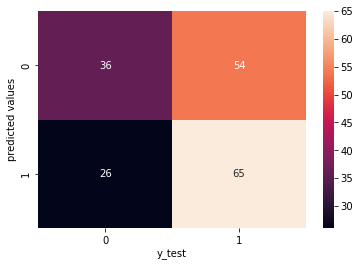

In [157]:
#importing logistic regression
import seaborn as sns
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

predicted_values = logistic_model.predict(X_test)
logistic_score = logistic_model.score(X_test, y_test)

print('precision : ', metrics.precision_score(y_test, predicted_values))
print('accuracy : ', metrics.accuracy_score(y_test , predicted_values))
print(logistic_score)

cm = confusion_matrix(y_test, predicted_values)
print(cm)
sns.heatmap(cm, annot = True)
plt.xlabel('y_test')
plt.ylabel('predicted values');

### Checking logistic model

In [88]:
class_label = {
    1 : 'There is fire',
    0 : 'There is NO fire'
}

In [97]:
x_new = [[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]

In [104]:
y_predicted = logistic_model.predict(x_new)
print(y_predicted)
print(class_label[y_predicted[0]])

[0.]
There is NO fire


## KNN

In [106]:
#importing k nearest neighbour
from sklearn.neighbors import KNeighborsClassifier
k_nearest_neighbor_model = KNeighborsClassifier()
k_nearest_neighbor_model.fit(X_train, y_train)
pred = k_nearest_neighbor_model.predict(X_test)

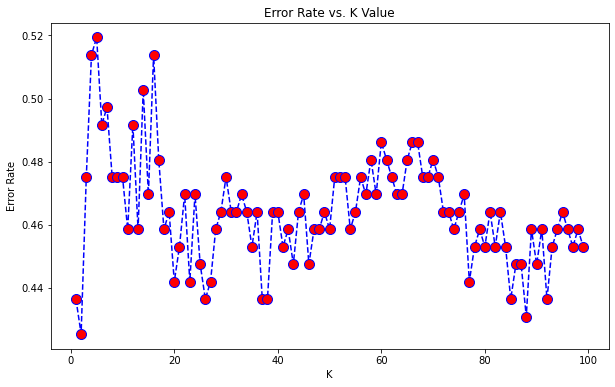

In [108]:
error_rate = []
for i in range(1,100):
    k_nearest_neighbor_model = KNeighborsClassifier(n_neighbors=i)
    k_nearest_neighbor_model.fit(X_train,y_train)
    pred_i = k_nearest_neighbor_model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

In [110]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.5193370165745856

In [111]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test, pred))

Accuracy: 0.5193370165745856
Precision: 0.5181818181818182


## Chechking knn:

In [112]:
classes = { 0:'Safe',
          1 : 'ON FIRE'}

In [113]:
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
y_predict=knn.predict(x_new)
print(classes[y_predict[0]])

ON FIRE


## SVM

model score: 0.56353591160221
ACCURACY:  0.56353591160221
PRECISION:  0.5491803278688525


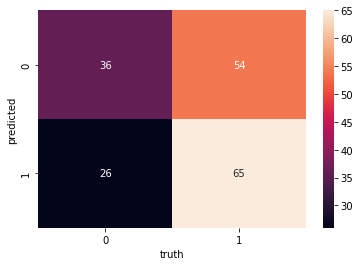

In [125]:
# importing support vector machine
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
pred_svc = svc_model.predict(X_test)
print('model score:', svc_model.score(X_test,y_test))
cm_svc = confusion_matrix(y_test, pred_svc)

print('ACCURACY: ', metrics.accuracy_score(y_test, pred_svc))
print('PRECISION: ', metrics.precision_score(y_test, pred_svc))
sns.heatmap(cm, annot =True)
plt.xlabel('truth')
plt.ylabel('predicted');


In [120]:
#prediction using svm
classes={0:'SAFE',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
y_predict=svc_model.predict(x_new)
print(classes[y_predict[0]])

SAFE


## Decision Tree

In [126]:
from sklearn.tree import DecisionTreeClassifier

d_tree_model = DecisionTreeClassifier()
d_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

model score :  0.5082872928176796
Accuracy: 0.5082872928176796
Precision: 0.5094339622641509


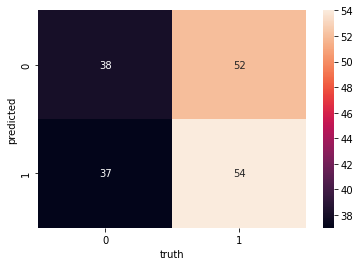

In [132]:
# make predictions
pred_dtree = d_tree_model.predict(X_test)
# summarize the fit of the model
cm = confusion_matrix(y_test, pred_dtree)

print('model score : ', d_tree_model.score(X_test, y_test))
print("Accuracy:",metrics.accuracy_score(y_test, pred_dtree))
print("Precision:",metrics.precision_score(y_test, pred_dtree))

sns.heatmap(cm, annot = True)
plt.xlabel('truth')
plt.ylabel('predicted');

## Checking model

In [136]:
#prediction using decision tree
classes={0:'SAFE',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
y_predict=d_tree_model.predict(x_new)
classes[y_predicted[0]]

'SAFE'

## Random Forest

Accuracy: 0.6077348066298343
Precision: 0.5877192982456141
model score:  0.6077348066298343


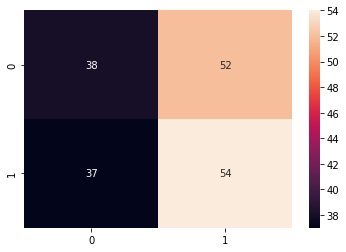

In [142]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
pred_rf = random_forest_model.predict(X_test)
cm_rf = metrics.confusion_matrix(y_test, pred_rf)


print("Accuracy:", metrics.accuracy_score(y_test, pred_rf))
print("Precision:", metrics.precision_score(y_test, pred_rf))
print('model score: ', random_forest_model.score(X_test, y_test))

sns.heatmap(cm, annot = True);

In [143]:
#prediction using random forest
classes={0:'SAFE',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
y_predict=random_forest_model.predict(x_new)
print(classes[y_predict[0]])

On Fire


In [159]:
import pickle
with open('forest-fire-detection.pickle', 'wb') as f:
    pickle.dump(random_forest_model, f)